In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
data_path = f"../data/zomato_processed.csv"
df_original = pd.read_csv(data_path)
df = df_original.copy()

## Functions

In [12]:
def cities_bar_plot(df, cols, x, y, z, operacao, ascending = [True, False], title='Título', xaxis_title='Eixo X', yaxis_title='Eixo Y', 
                    legend_title_text = 'Legenda'):
    # Seleciona as colunas especificadas
    df_aux = df.loc[:, cols]
    
    # Aplica a operação especificada
    df_aux = df_aux.groupby([z, x])[y].apply(operacao).reset_index()
    
    # Ordena o DataFrame com base no z e y
    df_aux = df_aux.sort_values(by = [z, y], ascending = ascending)

    # Seleciona os 10 primeiros números
    df_aux = df_aux.groupby(z).head(10).reset_index()
    
    # Gráfico
    fig = px.bar(df_aux, 
                 x = x, 
                 y = y,
                 color = z, 
                 title = title,
                 text = y) # adiciona o valor nas barras
    
    # Renomeia eixos e legenda
    fig.update_layout(xaxis_title = xaxis_title,  # renomeia o eixo x
                      yaxis_title = yaxis_title,  # renomeia o eixo y
                      legend_title_text = legend_title_text,  # título da legenda
                      template = 'plotly_dark',  # altera o tema
                      font = dict(size=12),  # altera o tamanho da fonte
                      title_x = 0.5,  # centraliza o título
                      height = 600,  # define a altura do gráfico
                      width = 1300)   # define a largura do gráfico
    
    # Atualiza as anotações para exibir os valores nas barras
    fig.update_traces(
        texttemplate='%{text:.0f}', 
        textposition='outside',  # exibir o valor fora da barra
        textfont_size=10  # tamanho da fonte dos valores
    )
    
    # Plota o Gráfico
    return fig.show()

In [25]:
def cities_rank_bar_plot(df, lines, cols, x, y, z, r, operacao, ascending = [True, False], title='Título', xaxis_title='Eixo X', yaxis_title='Eixo Y', 
                         legend_title_text = 'Legenda'):
   
    # Seleciona as colunas especificadas e aplica o filtro
    df_aux = df.loc[lines, cols]
    
    # Aplica a operação especificada
    df_aux = df_aux.groupby([z, x]).agg({r: operacao[0], y: operacao[1]})
    df_aux.columns = [r, y]
    df_aux.reset_index(inplace = True)
    
    # Ordena o DataFrame com base no z e y
    df_aux = df_aux.sort_values(by = [z, y], ascending = ascending)

    # Seleciona os 10 primeiros números
    df_aux = df_aux.groupby(z).head(10).reset_index(drop=True)
    
    # Gráfico
    fig = px.bar(df_aux, 
                 x = x, 
                 y = y,
                 color = z, 
                 title = title,
                 text = y) # adiciona o valor nas barras
    
    # Renomeia eixos e legenda
    fig.update_layout(xaxis_title = xaxis_title,  # renomeia o eixo x
                      yaxis_title = yaxis_title,  # renomeia o eixo y
                      legend_title_text = legend_title_text,  # título da legenda
                      template = 'plotly_dark',  # altera o tema
                      font = dict(size=12),  # altera o tamanho da fonte
                      title_x = 0.5,  # centraliza o título
                      height = 600,  # define a altura do gráfico
                      width = 1300)   # define a largura do gráfico
    
    # Atualiza as anotações para exibir os valores nas barras
    fig.update_traces(
        texttemplate='%{text:.0f}', 
        textposition='outside',  # exibir o valor fora da barra
        textfont_size=10  # tamanho da fonte dos valores
    )

    # Plota o Gráfico
    return fig.show()

## Apply Functions

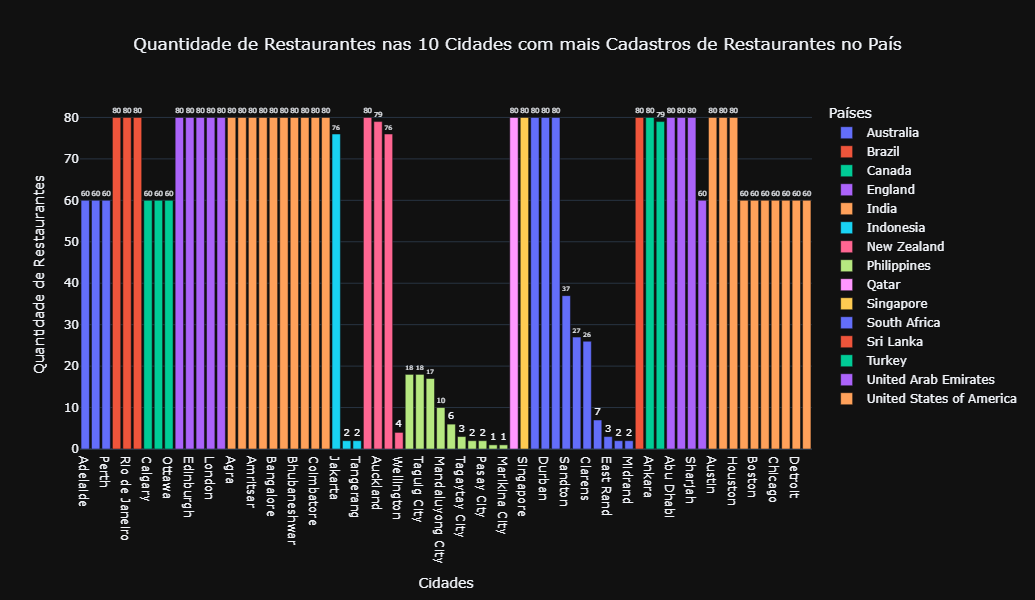

In [13]:
# Quantidade de Restaurantes nas 10 Cidades com mais Cadastros de Restaurantes no País
cols = ['country_name', 'city', 'restaurant_id']
df = df_original.copy()
x = 'city'
y = 'restaurant_id'
z = 'country_name'
operacao = pd.Series.nunique
title = 'Quantidade de Restaurantes nas 10 Cidades com mais Cadastros de Restaurantes no País'
xaxis_title = 'Cidades'
yaxis_title = 'Quantidade de Restaurantes'
legend_title_text = 'Países'

restaurantes_por_cidade = cities_bar_plot(df, cols, x, y, z, operacao, ascending = [True, False], title = title, xaxis_title = xaxis_title, yaxis_title = yaxis_title, legend_title_text = legend_title_text)
restaurantes_por_cidade

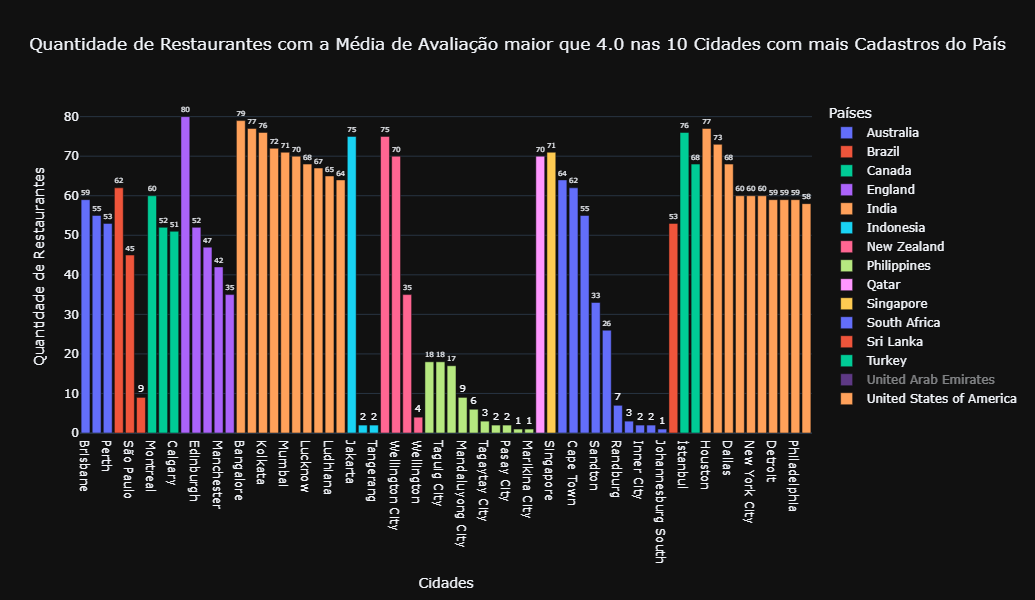

In [26]:
# Quantidade de Restaurantes com a Média de Avaliação maior que 4.0 nas 10 Cidades com mais Cadastros do País
cols = ['country_name', 'city', 'aggregate_rating', 'restaurant_id']
df = df_original.copy()
lines = df['aggregate_rating'] >= 4.0
x = 'city'
y = 'restaurant_id'
z = 'country_name'
r = 'aggregate_rating'
operacao = ['mean', 'nunique']
title = 'Quantidade de Restaurantes com a Média de Avaliação maior que 4.0 nas 10 Cidades com mais Cadastros do País'
xaxis_title = 'Cidades'
yaxis_title = 'Quantidade de Restaurantes'
legend_title_text = 'Países'

restaurantes_4stars_por_cidade = cities_rank_bar_plot(df, lines, cols, x, y, z, r, operacao, ascending = [True, False], title = title, xaxis_title = xaxis_title, yaxis_title = yaxis_title, legend_title_text = legend_title_text)
restaurantes_4stars_por_cidade

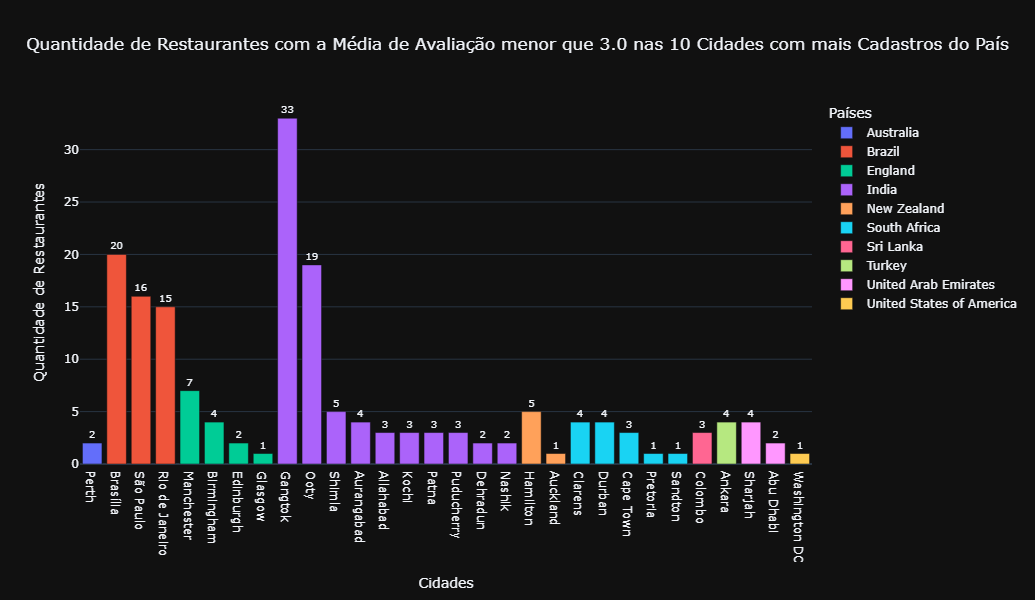

In [27]:
# Quantidade de Restaurantes com a Média de Avaliação menor que 3.0 nas 10 Cidades com mais Cadastros do País
cols = ['country_name', 'city', 'aggregate_rating', 'restaurant_id']
df = df_original.copy()
lines = df['aggregate_rating'] <= 3.0
x = 'city'
y = 'restaurant_id'
z = 'country_name'
r = 'aggregate_rating'
operacao = ['mean', 'nunique']
title = 'Quantidade de Restaurantes com a Média de Avaliação menor que 3.0 nas 10 Cidades com mais Cadastros do País'
xaxis_title = 'Cidades'
yaxis_title = 'Quantidade de Restaurantes'
legend_title_text = 'Países'

restaurantes_4stars_por_cidade = cities_rank_bar_plot(df, lines, cols, x, y, z, r, operacao, ascending = [True, False], title = title, xaxis_title = xaxis_title, yaxis_title = yaxis_title, legend_title_text = legend_title_text)
restaurantes_4stars_por_cidade

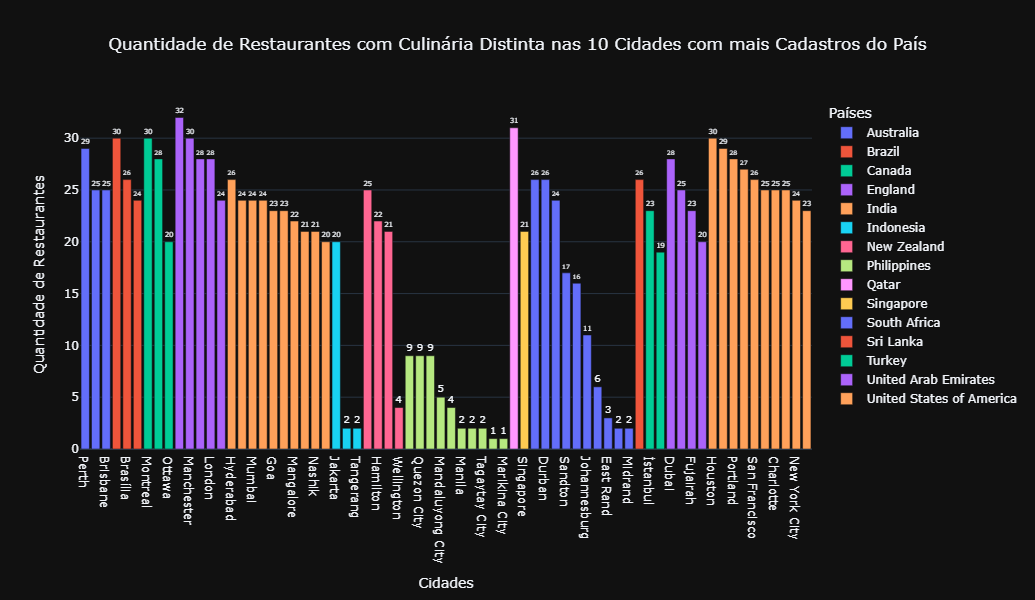

In [28]:
# Quantidade de Restaurantes com Culinária Distinta nas 10 Cidades com mais Cadastros do País
cols = ['country_name', 'city', 'cuisines']
df = df_original.copy()
x = 'city'
y = 'cuisines'
z = 'country_name'
operacao = pd.Series.nunique
title = 'Quantidade de Restaurantes com Culinária Distinta nas 10 Cidades com mais Cadastros do País'
xaxis_title = 'Cidades'
yaxis_title = 'Quantidade de Restaurantes'
legend_title_text = 'Países'

restaurantes_por_cidade = cities_bar_plot(df, cols, x, y, z, operacao, ascending = [True, False], title = title, xaxis_title = xaxis_title, yaxis_title = yaxis_title, legend_title_text = legend_title_text)
restaurantes_por_cidade